<a href="https://colab.research.google.com/github/sadhgunavarshinie17/Beats-By-Dre-Data-Analysis-Extern/blob/main/Final_Copy_of_Beats_by_Dre_Consumer_Insights_Capstone_Project_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project: Consumer Insights Data Analytics Externship of Beats by Dre

## 1. Title Page

**Project Title:** Consumer Insights Data Analytics Externship of Beats by Dre  
**Student Name:** Sadhguna Varshinie  
**Date:** 31/08/2024


## 2. Table of Contents
1. Introduction
2. Data Description
3. Exploratory Data Analysis (EDA)
4. Sentiment Analysis
5. AI-Generated Insights
6. Comparative Analysis
7. Strategic Recommendations
8. Conclusion
9. References

## 3. Introduction

### 3.1 Project Overview

The purpose of the project is to analyse the consumer reviews of various different products from different companies and compare them with the products from Beats. It is also performed to check how the consumers feel about the product, what they like and dislike, and to note what things could be improved in the product. It could also be used to predict the market trends and make a suitable product according to the needs of the consumers.

The key objectives are:

- To collect data from Amazon reviews regarding products from different companies.
- To clean the data.
- To provide a summary of the dataset which includes statistics like mean, median, mode.
- To graphically represent the data collected using plots like histograms, box plots, etc.
- To summarize the visualisations and retrieve insights.
- To use Gemini AI to extract insights using suitable prompts that provide great feedback on Beats product, compared to competitor products.
- To look for the aspects that consumers liked the most in the product, and also focus on pain points that could be improved.

### 3.2 Background

The leading audio brand Beats by Dre was founded by Dr. Dre and Jimmy lovine. It is well-known for its quality headphones, earphones and speakers. Since then, Beats by Dre has introduced high-quality audio performance and combined its state-of-the-art design to enhance consumer experience. The company was acquired by Apple Inc. in 2014, which solidified its position in the tech industry. It created its own unique style recognised by the superior sound quality of its products. The brand influences the market till this date, and cements its stance as a hub for innovation in the audio technology sector.

For a company like Beats by Dre, it is necessary to perform consumer sentiment analysis, especially because it is a leading company in the tech industry. Consumer sentiment analysis helps us to analyse the stance of its products compared with competitor products. It helps the company to identify the things consumers love the most about the product and also the things they would like to be changed. It aids in understanding the aspects of the product that receives frequent complaints so that it could be addressed, and a better product could be made in accordance with the consumer preferences. It helps the company to stay ahead of competition.

## 4. Data Description

### 4.1 Data Sources

The data used in the analysis was scraped from Amazon reviews. The collection was done using OxyLabs API.


### 4.2 Data Collection

The collection process was done by first choosing one Beats by Dre product, i.e., the Beats Pill speaker, followed by speakers from competitor companies. The collection was done aiming for around 100 reviews per product. The URL from suitable products were pasted onto the OxyLabs API tool to get the reviews. Around 1000 reviews were collected for analysis. The data was stored in CSV files. Then the CSV files were loaded into data frames, which were merged together to concatenate all the data. The merged data frame was exported as a CSV file for analysis.

The major challenge faced was while scraping the reviews. It was difficult to scrape more than 10 reviews at once using the OxyLabs API tool, hence a dataset provided by the Extern team was used.



**The different products were collected according to product ID, however for clear comparison, the names of each of the products are as given below:**

B01IOD7KB6 - House of Marley Speaker  
B07DD3WBYW - Ultimate Ears Boom Speaker  
B07GWRCZQP - JBL Charge 4 Speaker  
B07YBN9XXG - Bose Soundlink Speaker  
B08NLCW9WY - JBL Xstream 3 Speaker  
B08VL5S148 - Bose SoundLink Revolve+ (Series II) Speaker  
B08X4YMTPM - JBL Charge 5 Speaker  
B08YRT9T38 - Bang & Olufsen Beosound Explore Speaker  
B099TJGJ91 - Bose SoundLink Flex Speaker  
B0D4SX9RC6 - Beats Pill Speaker

### 4.3 Data Cleaning

In order to perform data cleaning, the dataset was loaded into the Colab notebook. First, the missing values in the dataset were handled. This was done by deciding whether to delete these missing cells, or to fill it with the mean value. The dataset was checked for outliers, which weren't present. This process was followed by converting categorical columns to numerical values. The column 'rating' was converted to hold numerical values for better analysis.

The resulting data was cleaned and processed and made ready for analysis.

The code written is as given below:

In [ ]:
import csv
import pandas as pd

file_path = '/content/dataset_2.csv'
with open(file_path, 'r') as file:
    reader = csv.DictReader(file)
    data = [row for row in reader]  # This is now a list of dictionaries

reviews_data = []
count = 0

# Directly loop over the rows in data
for review in data:
    count += 1
    try:
        review_info = {
            'review_id': review['review_id'],
            'product_id': review['product_id'],
            "title": review["title"],
            "author": review["author"],
            "rating": review["rating"],
            "content": review["content"],
            "timestamp": review["timestamp"],
            "profile_id": review["profile_id"],
            "is_verified": review["is_verified"],
            "helpful_count": review.get('helpful_count', 0),
            "product_attributes": review["product_attributes"]
        }
        reviews_data.append(review_info)
    except KeyError:
        print(f"Error processing review {count}")
        break

# Convert the list of dictionaries to a DataFrame
reviews_df = pd.DataFrame(reviews_data)

# Save the DataFrame to a CSV file
reviews_df.to_csv('reviews.csv', index=False)


reviews_df['rating_numeric'] = pd.to_numeric(reviews_df['rating'], errors='coerce')
reviews_df['helpful_count'] = pd.to_numeric(reviews_df['helpful_count'], errors='coerce')


print("Missing values: ", reviews_df.isnull().sum())
reviews_df.dropna(inplace=True)

duplicates = reviews_df.duplicated().sum()
print(f'\nDuplicates: {duplicates}')


reviews_df.to_csv('cleaned_reviews.csv', index=False)

Missing values:  review_id             0
product_id            0
title                 0
author                0
rating                0
content               0
timestamp             0
profile_id            0
is_verified           0
helpful_count         0
product_attributes    0
rating_numeric        0
dtype: int64

Duplicates: 0


In [ ]:
cleaned_reviews_df = pd.read_csv('/content/cleaned_reviews.csv')
cleaned_reviews_df.head()

,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes,rating_numeric
0,R3AK5LLZ1VVTWJ,B08X4YMTPM,"5.0 out of 5 stars INSANE Speaker! Quality, vo...",Jeremy,5,The JBL Charge 5 is the BEST speaker I have ev...,"Reviewed in the United States April 5, 2024",AEDM32EKQE2HOHUCSXFF2Z27F7NQ,1,69,Color: Black,5
1,R158T5SJCSV7IQ,B08X4YMTPM,5.0 out of 5 stars Amazing Sound and Great Dur...,Miguel Gomez,5,The media could not be loaded. I recently got ...,"Reviewed in the United States May 30, 2024",AEPFUMZ5YUTQEWFAW7FOQKK4BDBA,1,22,Color: Black,5
2,R2W6HMIGUIMKC3,B08X4YMTPM,5.0 out of 5 stars Absolutely Perfect,Amazon Customer,5,This is the perfect little system to enjoy mus...,"Reviewed in the United States June 12, 2024",AEVWSW7IQXZUVDUWA76JQT4AZ5HA,1,10,Color: White,5
3,R2XH2B2MFNR1T6,B08X4YMTPM,5.0 out of 5 stars Absolutely Love,Km,5,This speaker is amazing! Bluetooth connectivit...,"Reviewed in the United States July 29, 2024",AG2RLDGSL7EPQV22ZIBWJEOTHHZA,1,0,Color: Black,5
4,R1FKLVZ3EN7GEG,B08X4YMTPM,5.0 out of 5 stars Packs a punch for such a sm...,Dr. D,5,I didn't think I would get this much sound out...,"Reviewed in the United States June 28, 2024",AGMIWSM7UUQK3NFF5TJRKI2RHF2A,1,5,Color: Red,5


## 5. Exploratory Data Analysis (EDA)

### 5.1 Data Overview
The dataset was then used to create a summary which includes key statistics like mean, median, mode, standard deviation, etc.


In [ ]:
print("Description: ")
print(reviews_df.describe())

print("\nMean: ", reviews_df[['rating_numeric']].mean())

print("\nMode: ", reviews_df[['rating_numeric']].mode())

print("\nMedian: ", reviews_df[['rating_numeric']].median())

print("\nStandard Deviation: ", reviews_df[['rating_numeric']].std())

print("\nVariance: ", reviews_df[['rating_numeric']].var())

Description: 
       helpful_count  rating_numeric
count     884.000000      884.000000
mean        3.652715        4.580317
std        19.764365        0.929751
min         0.000000        1.000000
25%         0.000000        5.000000
50%         0.000000        5.000000
75%         2.000000        5.000000
max       309.000000        5.000000

Mean:  rating_numeric    4.580317
dtype: float64

Mode:     rating_numeric
0               5

Median:  rating_numeric    5.0
dtype: float64

Standard Deviation:  rating_numeric    0.929751
dtype: float64

Variance:  rating_numeric    0.864437
dtype: float64


### 5.2 Visualizations
Relevant visualizations such as histograms, box plots, etc. are given below.

In [ ]:
product_summary = reviews_df.groupby('product_id').agg({
    'rating_numeric': 'mean',
    'helpful_count': 'mean',
}).reset_index()

# Renaming columns
product_summary.rename(columns={
    'rating_numeric': 'rating_numeric_mean',
    'helpful_count': 'helpful_count_mean',
}, inplace=True)

print(product_summary.head(10))

   product_id  rating_numeric_mean  helpful_count_mean
0  B01IOD7KB6             4.470000            1.450000
1  B07DD3WBYW             4.100000           43.700000
2  B07GWRCZQP             4.860000            0.100000
3  B07YBN9XXG             3.940000            3.590000
4  B08NLCW9WY             4.690000            6.600000
5  B08VL5S148             4.690000            4.680000
6  B08X4YMTPM             4.880342            1.487179
7  B08YRT9T38             4.330000            4.450000
8  B099TJGJ91             4.850000            4.470000
9  B0D4SX9RC6             4.456140            1.473684


**Bar plot showing "Average Rating for each Product"**

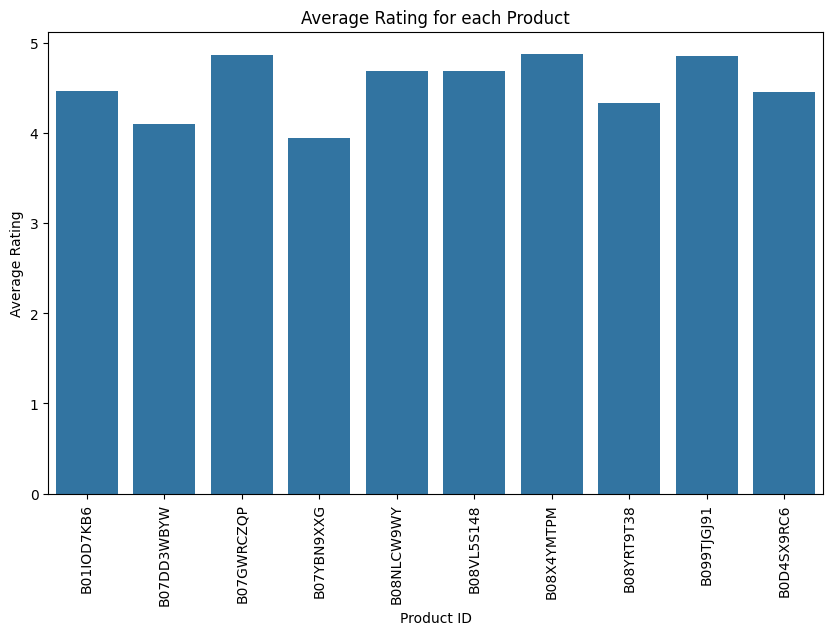

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Average Rating for each Product

plt.figure(figsize=(10,6))
sns.barplot(x='product_id', y='rating_numeric_mean', data=product_summary)
plt.title('Average Rating for each Product')
plt.xlabel('Product ID')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()

The above bar plot can be used to compare the ratings of the respective products from competitor companies. It can be interpreted that most of the product have ratings lying between 4 to 5, which makes the audio technology market a highly competitive one, with so many successful brands. The product B0D4SX9RC6 (Beats Pill Speaker) has a pretty good rating compared to other products, but still has room for improvement.

**Bar plot showing "Average Helpful Count for each Product"**

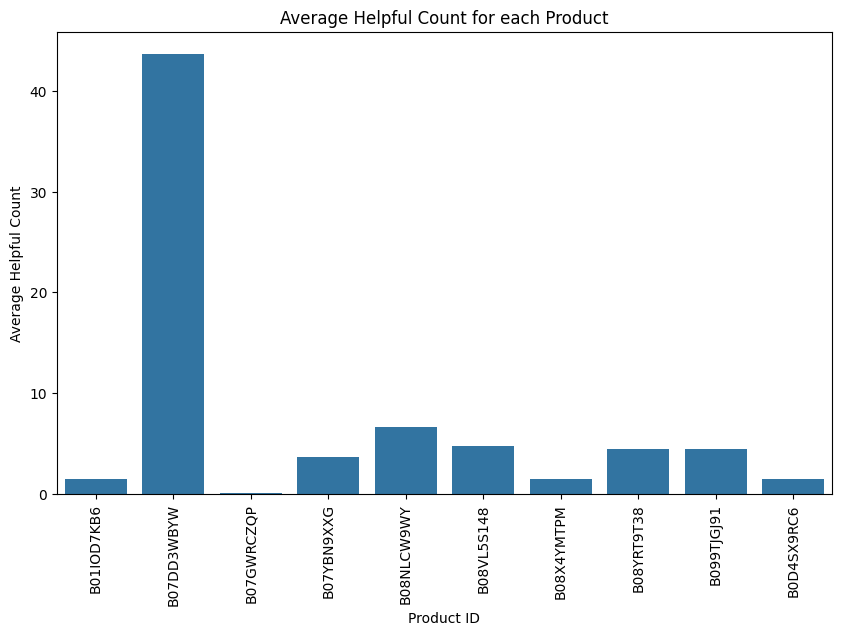

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='product_id', y='helpful_count_mean', data=product_summary)
plt.title('Average Helpful Count for each Product')
plt.xlabel('Product ID')
plt.ylabel('Average Helpful Count')
plt.xticks(rotation=90)
plt.show()

The above graph shows the relationship between the products and their respective helpful count, which is the number of people that found the reviews helpful. With the results obtained, it is visible that only one product seems to have a really high average helpful count. Also, it could be interpreted logically that the helpful count may not be a factor that would explain the quality of the product in itself.

**Histogram comparing the frequency of the ratings**



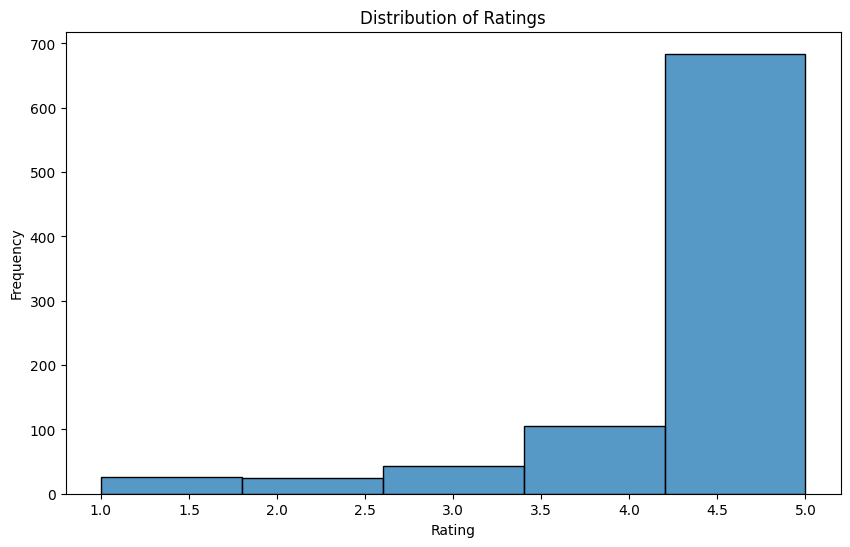

In [ ]:
# Histogram comparing the frequency of the ratings

plt.figure(figsize=(10,6))
sns.histplot(reviews_df['rating_numeric'], bins=5, kde=False)  # `kde=False` to disable the kernel density estimate
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

The above graph displays the distribution of ratings across 1 to 5, and it can be noted that most of the ratings obtained lie between 4 to 5, which means all of the products selected are really good and competitive.

**Box plot comparing the ratings for the different products**

<ipython-input-27-8ce0849dced2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='product_id', y='rating_numeric', data=reviews_df, palette='Set2')


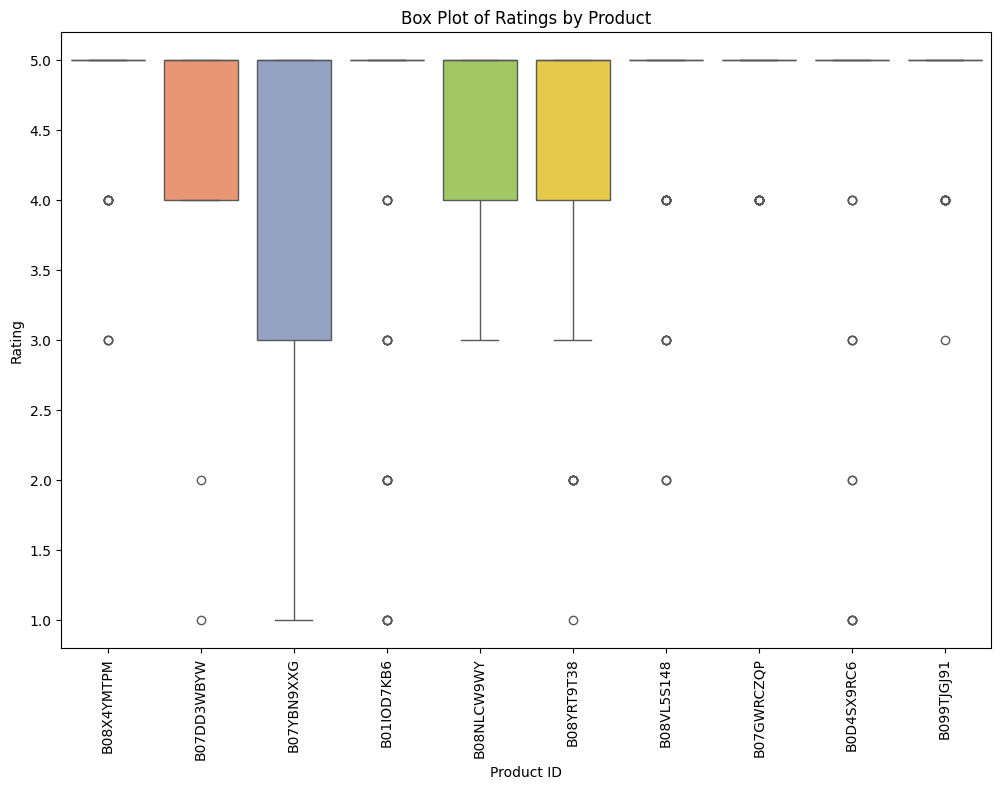

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='product_id', y='rating_numeric', data=reviews_df, palette='Set2')
plt.title('Box Plot of Ratings by Product')
plt.xlabel('Product ID')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()

The above box plot compares the ratings of each of the products. It can be observed that most of the ratings have a perfect score of 5. There are a few outliers for most products too, but the ratings are usually between 4 to 5. The Beats Pill Speaker seems to be receiving high ratings most of which are at 5, with outliers from 1.0 to 4.0.

The consumer experiences for Beats Pill Speaker are not mixed and confusing between positive and negative, but rather mostly concentrated on highly positive and satisified ratings.

**Scatter plot comparing the ratings and respective helpful count for the different products**


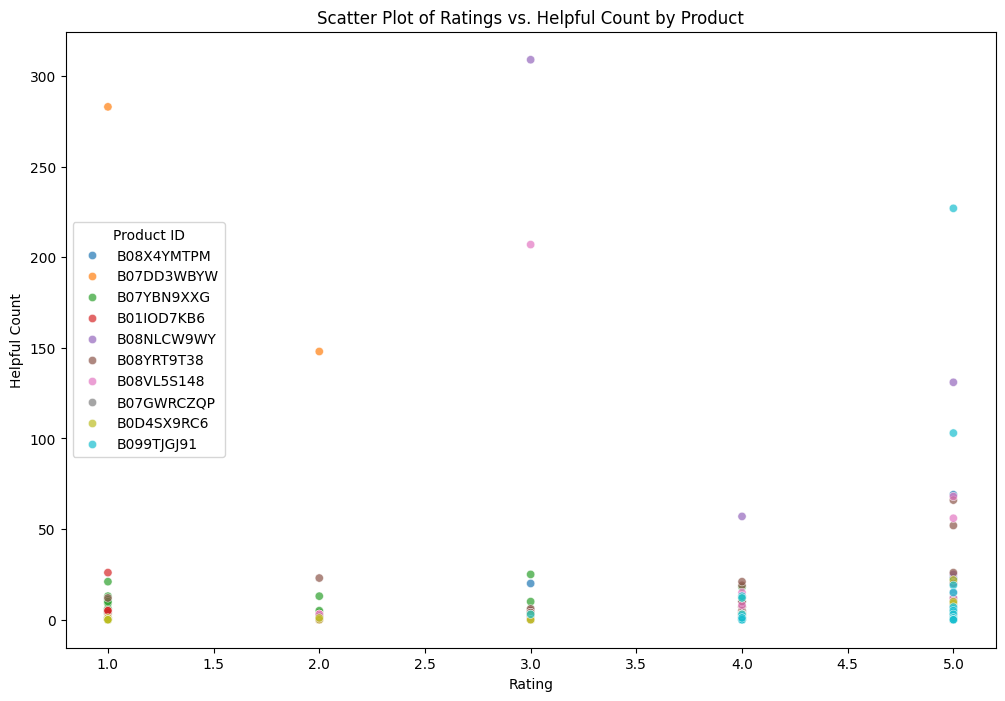

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='rating_numeric', y='helpful_count', hue='product_id', data=reviews_df, palette='tab10', alpha=0.7)
plt.title('Scatter Plot of Ratings vs. Helpful Count by Product')
plt.xlabel('Rating')
plt.ylabel('Helpful Count')
plt.legend(title='Product ID')
plt.show()


The above scatter plot compares the ratings and helpful count for each of the products. Again, it can be noticed that most of the products have high ratings, but these ratings do not seem to particularly influence the helpful count.

**Violin plot comparing the ratings for the different products**


<ipython-input-10-cad5a201c925>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='product_id', y='rating_numeric', data=reviews_df, palette='Set2')


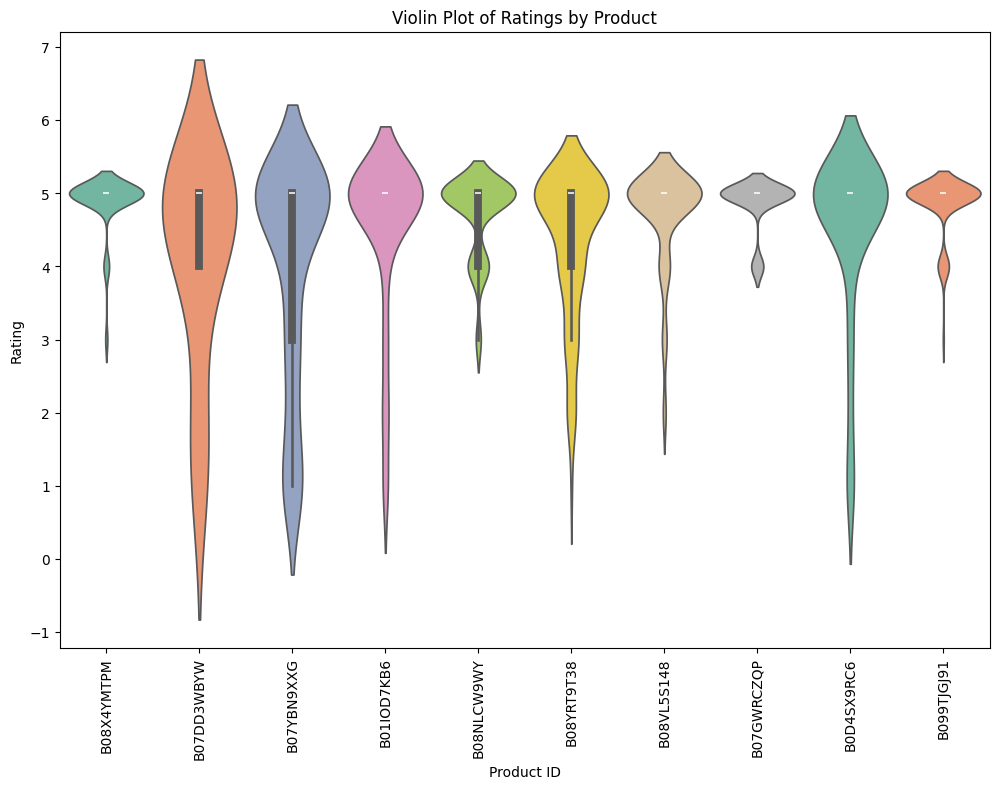

In [ ]:
plt.figure(figsize=(12,8))
sns.violinplot(x='product_id', y='rating_numeric', data=reviews_df, palette='Set2')
plt.title('Violin Plot of Ratings by Product')
plt.xlabel('Product ID')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()

The above violin plot compares the distribution of the rating scores across the different products. It provides a different visualization for a similar analysis made through the box plot. It is clearly evident that the Beats Pill speaker has ratings concentrated at 5.0, with a few outliers from 1.0 to 4.0.

**Word Cloud representing the frequent words used to describe the Beats Pill Speaker**

A word cloud could be used to check the various different words that are used in the review descriptions. This would aid in finding out how the costumers perceive the product. The best qualities and the frequent complaints could be identified and handled.

In [ ]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

filter_contentBeats = reviews_df[reviews_df['product_id'] == 'B0D4SX9RC6']
contentBeats = ' '.join(filter_contentBeats['content'].tolist())

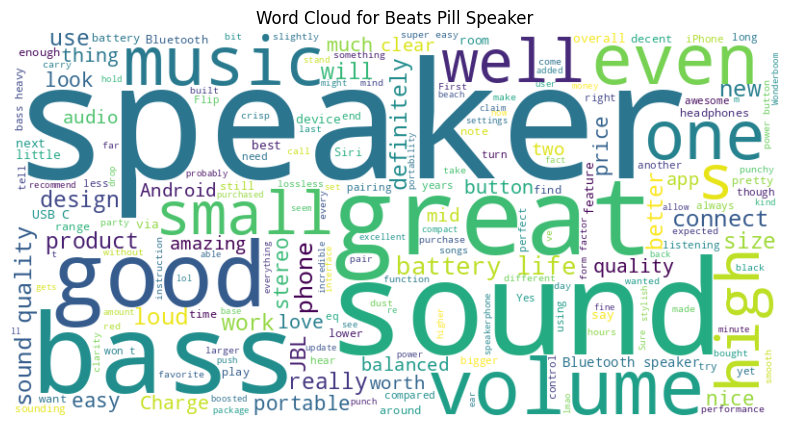

In [ ]:
stopwords = set(STOPWORDS)
stopwords.update(['Apple', 'Beats', 'Pill'])

wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(contentBeats)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Beats Pill Speaker')
plt.show()

Evident from the word cloud, there are a maximum of positive reviews inluding words like 'quality', 'good', 'great', etc.

**Correlation Analysis and Heatmap**

In [ ]:
correlation_matrix = reviews_df[['rating_numeric', 'helpful_count']].corr()
print(correlation_matrix)

                rating_numeric  helpful_count
rating_numeric        1.000000      -0.161275
helpful_count        -0.161275       1.000000


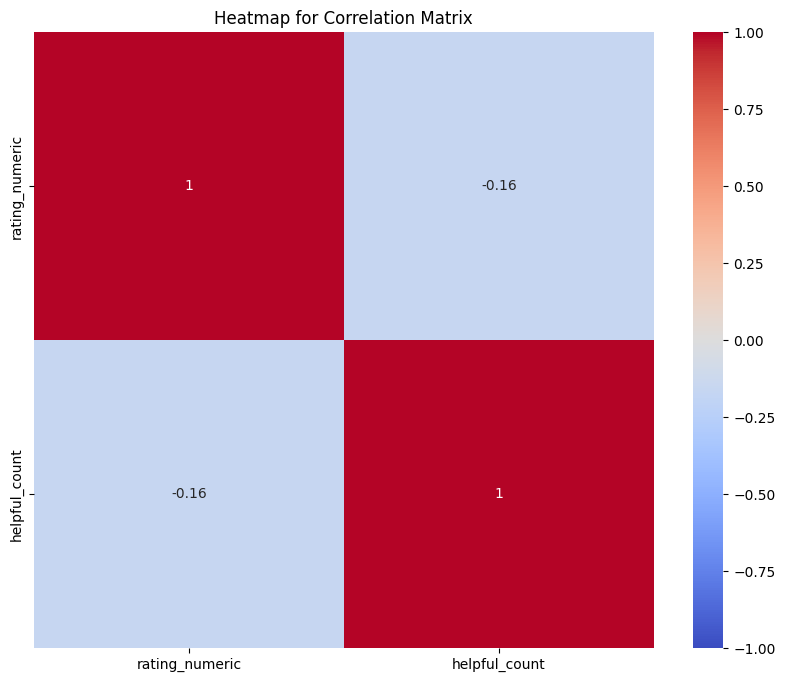

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap for Correlation Matrix')
plt.show()

Interpretation of results:

The correlation coefficient is -0.161 between 'rating_numeric' and 'helpful_count'. This shows a weak negative correlation, which means that there is no strong correlation between them, indicating that the rating given to the products does not strongly influence the number of people who found it helpful.

The correlation coefficient between 'rating_numeric' with itself is 1.000 as it is perfectly correlated with itself.

The correlation between 'helpful_count' with itself is also perfectly positive, i.e., 1.000.

### 5.3 Descriptive Statistics
Through the graphical visualization made above, it could be noticed that most of the products have amazing ratings at 5.0, while some of them have ratings widely distributed across 1 to 5. The products with concentrated positive ratings show that they provide consistent high quality experiences. They are known to meet costumer expectations invariably. They could also be the company's flagship products.

On the other hand, there are products that receive highly varying feedback. Though there are good ratings, these products still might have persisting issues that affect the overall performance of the product. It is necessary these issues are looked upon.

Taking into consideration the Beats Pill Speaker, it has proved to perform well with high ratings, but there are a few outliers as well. There is still room for imrpovement, hence, there must be frequent analysis of consumer reviews, to stay ahead of competition.

## 6. Sentiment Analysis

### 6.1 Methodology
Sentiment analysis is a tool used to determine the emotional tool of a given text. There is a Python library called TextBlob that provides basic sentiment analysis. It offers polarity and subjectivity scores, that help decide the sentiment of the text.

NLTK is a similar, yet a more powerful tool that can handle sarcasm and negation as well.

In [ ]:
pip install textblob

In [ ]:
from textblob import TextBlob

def sentiment_analysis(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    subjectivity = analysis.sentiment.subjectivity

    if polarity > 0:
        sentiment = 'Positive'
    elif polarity < 0:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'

    return pd.Series([polarity, subjectivity, sentiment], index=['polarity', 'subjectivity', 'sentiment'])

sentiment_results = reviews_df['content'].apply(sentiment_analysis)
reviews_df = pd.concat([reviews_df, sentiment_results], axis=1)

In [ ]:
reviews_df.head()

,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes,rating_numeric,polarity,subjectivity,sentiment
0,R3AK5LLZ1VVTWJ,B08X4YMTPM,"5.0 out of 5 stars INSANE Speaker! Quality, vo...",Jeremy,5,The JBL Charge 5 is the BEST speaker I have ev...,"Reviewed in the United States April 5, 2024",AEDM32EKQE2HOHUCSXFF2Z27F7NQ,1,69,Color: Black,5,0.266337,0.507158,Positive
1,R158T5SJCSV7IQ,B08X4YMTPM,5.0 out of 5 stars Amazing Sound and Great Dur...,Miguel Gomez,5,The media could not be loaded. I recently got ...,"Reviewed in the United States May 30, 2024",AEPFUMZ5YUTQEWFAW7FOQKK4BDBA,1,22,Color: Black,5,0.310167,0.576467,Positive
2,R2W6HMIGUIMKC3,B08X4YMTPM,5.0 out of 5 stars Absolutely Perfect,Amazon Customer,5,This is the perfect little system to enjoy mus...,"Reviewed in the United States June 12, 2024",AEVWSW7IQXZUVDUWA76JQT4AZ5HA,1,10,Color: White,5,0.245145,0.596377,Positive
3,R2XH2B2MFNR1T6,B08X4YMTPM,5.0 out of 5 stars Absolutely Love,Km,5,This speaker is amazing! Bluetooth connectivit...,"Reviewed in the United States July 29, 2024",AG2RLDGSL7EPQV22ZIBWJEOTHHZA,1,0,Color: Black,5,0.291667,0.539630,Positive
4,R1FKLVZ3EN7GEG,B08X4YMTPM,5.0 out of 5 stars Packs a punch for such a sm...,Dr. D,5,I didn't think I would get this much sound out...,"Reviewed in the United States June 28, 2024",AGMIWSM7UUQK3NFF5TJRKI2RHF2A,1,5,Color: Red,5,0.372917,0.560417,Positive


### 6.2 Results
Most of the descriptions of the products are positive. The following code can be used to check that:


In [ ]:
sentiment_counts = reviews_df['sentiment'].value_counts()
print(sentiment_counts)

sentiment
Positive    771
Neutral      83
Negative     30
Name: count, dtype: int64


In [ ]:
# Aggregating the sentiment scores according to the different products

sentiment_mapping = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
reviews_df['sentiment_numeric'] = reviews_df['sentiment'].map(sentiment_mapping)

product_sentiment_summary = reviews_df.groupby('product_id').agg({
    'sentiment_numeric': 'mean'
}).reset_index()

product_sentiment_summary.rename(columns={
    'sentiment_numeric': 'average_sentiment_score'
}, inplace=True)

print(product_sentiment_summary)

   product_id  average_sentiment_score
0  B01IOD7KB6                 0.860000
1  B07DD3WBYW                 1.000000
2  B07GWRCZQP                 0.800000
3  B07YBN9XXG                 0.810000
4  B08NLCW9WY                 0.790000
5  B08VL5S148                 0.810000
6  B08X4YMTPM                 0.811966
7  B08YRT9T38                 0.810000
8  B099TJGJ91                 0.940000
9  B0D4SX9RC6                 0.947368


As noticed in the table above, it is evident that all average sentiment scores are highly positive ranging from around 0.8 to 1.0. Taking into consideration, Beats Pill Speaker, it has an average sentiment score of 0.947, which is the second highest amongst all brands. It proves that Beats by Dre has been doing a great job in providing quality products.

## 7. AI-Generated Insights

### 7.1 Using Gemini AI
Gemini AI is used to extract insights using suitable prompts that provide great feedback on Beats product, compared to competitor products.
It aids in looking for the aspects that consumers liked the most in the product, and also focus on pain points that could be improved.

In [ ]:
import google.generativeai as genai

In [ ]:
df = pd.read_csv('/content/reviews.csv')

api_key = "API KEY"

def analyze_reviews(reviews, api_key, prompt_message):
  genai.configure(api_key=api_key)

  model = genai.GenerativeModel(
      model_name="gemini-1.5-flash",
      generation_config={
          "temperature": 1,
          "top_p": 0.95,
          "top_k": 64,
          "max_output_tokens": 8192,
          "response_mime_type": "text/plain",
          },
  )

  chat_session = model.start_chat(history=[])

  prompt = prompt_message + "\n\n".join(reviews)
  response = chat_session.send_message(prompt)
  return response.text

In [ ]:
reviews_column_name = 'content'

In [ ]:
last_product_id = 'B0D4SX9RC6'
last_product_reviews = df[df['product_id'] == last_product_id][reviews_column_name]
reviews = last_product_reviews.tolist()

prompt_message = "Which aspect of the product do people love the most?"
insights = analyze_reviews(reviews, api_key, prompt_message)
print(insights)

People love the **sound quality** of the Beats Pill 2024 the most. They specifically praise its **punchy bass**, **crystal clear sound**, and **balanced audio**. 

Here are some quotes from the reviews highlighting this aspect:

* "The sound quality of this speaker is really great for its size, living up to the Beats name, filling the room with punchy bass and crystal clear sound."
* "Compared to all of them this is an amazing speaker for the price point. Bass is great. Clarity is great. Build quality is great."
* "The sound quality is amazing with great bass and clear vocals."
* "The audio is crystal clear, with balanced mids and highs. The bass is punchy yet smooth, making it great for various music genres."
* "This 2 pound speaker sounds insane for its size. It’s almost as loud as my jbl Xtreme 2. At lower volumes the music is balanced and you can hear details in the notes that definitely sound high-fi and high end."

The reviews also highlight other aspects people appreciate, such 

In [ ]:
last_product_id = 'B0D4SX9RC6'
last_product_reviews = df[df['product_id'] == last_product_id][reviews_column_name]
reviews = last_product_reviews.tolist()

prompt_message = "What are some frequent issues that people have mentioned to face?"
insights = analyze_reviews(reviews, api_key, prompt_message)
print(insights)

## Frequent Issues with the Beats Pill (2024) based on User Reviews:

While many users are impressed with the Beats Pill (2024), here are some recurring issues mentioned:

**Sound Quality:**

* **Bass-heavy sound:**  Many users found the bass to be overwhelming, sometimes overshadowing other frequencies and leading to a muddy sound at higher volumes.
* **Distortion at higher volumes:** The sound can become distorted and fuzzy when the volume is above 80%, impacting the overall audio quality. 
* **Lack of stereo image:**  Some users were disappointed by the lack of stereo sound for a speaker with its width.
* **No EQ settings:** Users have expressed a desire for an app with EQ controls to adjust the sound profile.

**Functionality:**

* **Randomly turning off:** Some users reported the speaker randomly turning off even when fully charged, often within 30 minutes of use.
* **Siri issues:**  Users experienced difficulty using Siri with the speaker, as it seems to interfere with the phone'

In [ ]:
UltimateEars = 'B07DD3WBYW'
BeatsPill = 'B0D4SX9RC6'

UltimateEars_reviews = df[df['product_id'] == UltimateEars][reviews_column_name]
BeatsPill_reviews = df[df['product_id'] == BeatsPill][reviews_column_name]

comparing_reviews = UltimateEars_reviews.to_list() + BeatsPill_reviews.to_list()

prompt_message = "How do you compare the speakers of Ultimate Ears and Beats Pill. Draft a markdown table."
insights = analyze_reviews(reviews, api_key, prompt_message)
print(insights)

## Ultimate Ears vs. Beats Pill Portable Speakers: A Comparison

| Feature | Ultimate Ears | Beats Pill |
|---|---|---|
| **Sound Quality** | Generally known for balanced sound, good for all genres | Bass-heavy, powerful sound, particularly for electronic and hip-hop |
| **Bass** | Less emphasized, often considered more accurate | Powerful and punchy, can be overwhelming for some |
| **Clarity** | Generally clear and detailed | Good clarity, but can be less detailed than Ultimate Ears |
| **Volume** | Varies between models, generally good for a room | Loud, can be too loud for some |
| **Portability** | Compact and lightweight, often waterproof | Compact and lightweight, waterproof |
| **Battery Life** | Generally long, with some models exceeding 24 hours | Claimed 24 hours, can vary based on volume |
| **Design** | Varies widely, with many colorful options | Pill-shaped, sleek and modern, with a variety of colors |
| **Durability** | Generally well-built and rugged |  Well-built, wate

## Ultimate Ears vs. Beats Pill: A Portable Speaker Showdown

| Feature | Ultimate Ears | Beats Pill |
|---|---|---|
| **Sound Quality** | Generally known for balanced sound with a focus on clarity. | Emphasizes bass with punchy, powerful sound. |
| **Bass** |  Good, but not as prominent as Beats. |  Strong, often described as "booming." |
| **Clarity** |  Excellent, often praised for detail and accuracy. |  Good, but can be slightly muddied at higher volumes. |
| **Volume** |  Powerful for its size. |  Very loud, capable of filling large rooms. |
| **Design** |  Wide variety of styles, often rugged and water-resistant. |  Sleek, minimalist design, often with a focus on aesthetics. |
| **Features** |  Often include features like 360-degree sound, app integration for EQ, and more. |  May offer features like speakerphone functionality, lossless audio over USB-C, and pairing for stereo sound. |
| **Price** |  Generally more affordable. |  Typically priced higher, reflecting Beats brand premium. |
| **Best For** |  Users who prioritize clear, well-balanced sound and features. |  Those who want powerful bass and a stylish design. |

**Note:** This table is a general comparison based on common opinions and reviews. Specific models within each brand may have varying features and performance.


### 7.2 Key Insights
Key Insights generated by Gemini AI in response to the prompts are given below:

**Prompt 1: Which aspect of the product do people love the most?**

The Beats Pill 2024 is a popular product for its powerful bass and clear audio, as well as its sleek design, lightweight size, long battery life, easy Bluetooth pairing, IP67 water and dust resistance, built-in microphone for clear calls, and lossless audio through USB-C. Its features make it a reliable choice for outdoor use.

**Prompt 2: What are some frequent issues that people have mentioned to face?**

The Beats Pill (2024) is a portable speaker with a bass-heavy sound quality, which may not be suitable for all music genres or audio content. It also suffers from distortion at high volumes and lacks EQ control. Some users criticize the lack of stereo imaging. The speaker also randomly turns on and off, requires a specific hold time, may interfere with Siri, has a dirty surface, has limited button functionality, and lacks a carrying strap. Its battery life is shorter than advertised and the one-touch connect feature is not working.

**Prompt 3: How do you compare the speakers of Ultimate Ears and Beats Pill. Draft a markdown table.**

**The response to this prompt was given in a table format. And the comparison can be summarised as below**

The Ultimate Ears and Beats Pill are portable speakers with varying sound quality, bass, clarity, volume, design, and features. The Ultimate Ears is known for its balanced sound and strong bass, while the Beats Pill is more affordable and features like 360-degree sound, app integration, speakerphone functionality, and stereo sound pairing. Both brands are best suited for users who prioritize clear, well-balanced sound and powerful bass.


### 7.3 Interpretation
The insights derived from Gemini AI responses can be used to inherit valuable knowledge about how the products are perceived amongst the consumers, and what improvements could be made. When it comes to the Beats Pill Speaker, the following insights are derived:

- Strengths: The consumers seem to love the powerful bass and the clear audio of the speaker, alongside its sleek design. Its Bluetooth pairing feature and the in-built microphone facility are welcomed pretty well. Besides all this, consumers admire the speaker's long battery life and portability, and its ability to be taken for outdoor use with ease.

- Challenges: There are some issues that consumers face like the disturbance in sound at high volumes, and in some cases malfunction of some buttons. Some of the consumers also complain of their incompatibility with the bass-heavy sound.

- Comparing with the Ultimate Ears speaker (Competitor): The Ultimate Ears Speaker differs from Beats Pill in its additional features like the 360-degree sound and app integration. It is also a more expensive product compared to the Beats Speaker.  

- Relevance to Beats: Though the Beats Pill Speaker offers great audio quality and portability in lesser cost, there is still room for improvement when it comes to innovating advanced features and new technology.

## 8. Comparative Analysis

### 8.1 Competitor Overview
The competitor brands analyzed are as given below:

- House of Marley - Renowned for its emphasis on providing sustainable products, inviting environmentally conscious customers. Also known for supplying quality sound through its products.

- Ultimate Ears - Known for its compatibility with outdoor setting, with its durability, 360-degree sound and robust performance.

- JBL- Remains a popular choice for a wide variety of customers, because of its stability and balance of price, audio quality and long-lasting battery life.

- Bose - Celebrated for its consistent high-end audio and clarity, and remains perfect for all categories of consumers that value premium sound quality.

- Bang & Olufsen - An overall good brand with focus on design and sound quality.

### 8.2 Comparison of Sentiments
Comparing the sentiment analysis results of Beats by Dre with its competitors using visualizations to highlight differences and similarities.

**Box Plot of Ratings by Product**

<ipython-input-28-8ce0849dced2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='product_id', y='rating_numeric', data=reviews_df, palette='Set2')


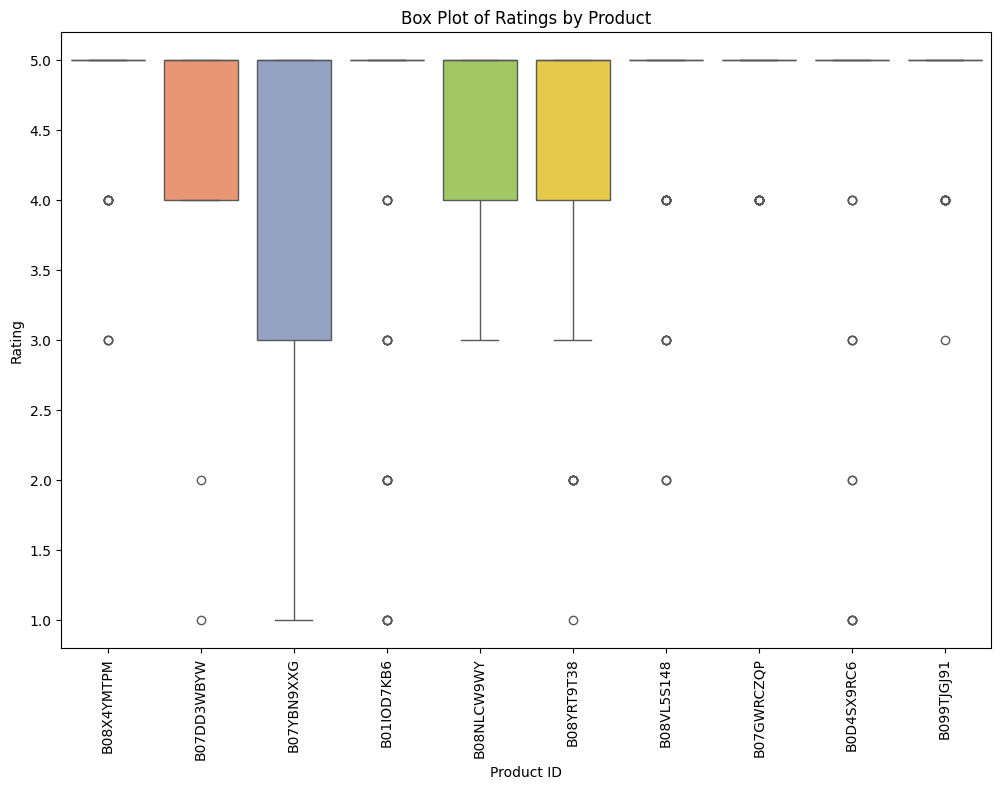

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='product_id', y='rating_numeric', data=reviews_df, palette='Set2')
plt.title('Box Plot of Ratings by Product')
plt.xlabel('Product ID')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()

The above box plot compares the ratings of each of the products. It can be observed that most of the ratings have a perfect score of 5. There are a few outliers for most products too, but the ratings are usually between 4 to 5. The Beats Pill Speaker seems to be receiving high ratings most of which are at 5, with outliers from 1.0 to 4.0.

The consumer experiences for Beats Pill Speaker are not mixed and confusing between positive and negative, but rather mostly concentrated on highly positive and satisified ratings.

**Average sentiment score of each product**

In [ ]:
print(product_sentiment_summary)

   product_id  average_sentiment_score
0  B01IOD7KB6                 0.860000
1  B07DD3WBYW                 1.000000
2  B07GWRCZQP                 0.800000
3  B07YBN9XXG                 0.810000
4  B08NLCW9WY                 0.790000
5  B08VL5S148                 0.810000
6  B08X4YMTPM                 0.811966
7  B08YRT9T38                 0.810000
8  B099TJGJ91                 0.940000
9  B0D4SX9RC6                 0.947368


As noticed in the table above, it is evident that all average sentiment scores are highly positive ranging from around 0.8 to 1.0. Taking into consideration, Beats Pill Speaker, it has an average sentiment score of 0.947, which is the second highest amongst all brands. It proves that Beats by Dre has been doing a great job in providing quality products.

### 8.3 SWOT Analysis
Conducting a SWOT analysis (Strengths, Weaknesses, Opportunities, Threats) for Beats by Dre based on the comparative data.

- **Strengths**:
The consumers seem to love the powerful bass and the clear audio of the speaker, alongside its sleek design. Its Bluetooth pairing feature and the in-built microphone facility are welcomed pretty well. Besides all this, consumers admire the speaker's long battery life and portability, and its ability to be taken for outdoor use with ease.

- **Weaknesses**:
There are some issues that consumers face like the disturbance in sound at high volumes, and in some cases malfunction of some buttons. There are complaints about the lack of EQ control as well. Some of the consumers also complain of their incompatibility with the bass-heavy sound.

- **Opportunities**:
There could be potential improvements made to fix the sound distortion issue. Advanced features like the EQ control and seamless app integration could be installed, that could strengthen the competition with brands like Ultimate Ears. There could also be newer variants of speakers made specially for consumers who do not prefer bass-heavy audio.

- **Threats**:
The extreme competition amongst various high-quality audio brands requires Beats by Dre to consistently meet consumer expectations to stay ahead of competition. Persistent technical issues and continuing with pre-existing features could make the brand viewed as out-dated. To keep the market share and win the competition, there must be additional research about advanced features and newer technology that could be implemented in the products.


## 9. Strategic Recommendations

### 9.1 Product Improvements
Based on the analysis, these are some specific product improvements that could be suggested:

- Improving quality of soung by handling the sound distortion at higher volumes.
- Additionally, implementing seamless app integration and Equalizer control.
- Addressing technical issues and providing minimalistic design.
- Introducing features like adaptive sound to invite more users.
- Enhancing the 360-degree sound feature.
- Increasing durability by making it suitable for harsh outdoor and pool setting.
- Enhancing Bluetooth connectivity by allowing multiple devices to connect simultaneously.
- Providing software updates on a regular basis
- Focusing on supplying premium quality audio products in lesser cost than competitors.

### 9.2 Marketing Strategies
 Marketing strategies that could enhance consumer perception and satisfaction are as follows:

 - Taking the winner features of the product into consideration during marketing campaigns, like the powerful bass, design, clear audio and durability.
 - Promoting flagship products.
 - Advertising the product using the multiple positive reviews that are obtained on social platforms.
 - Enhancing User Generated Content, and building trust.
 - Collborating with social media influencers to promote the product and provide emphasis on its best qualities.
 - Providing live demonstration sessions during the campaign and also encouraging hands-on experiences for the consumers at Beats by Dre stores.
 - Addressing technical issues and other complaints consistently and innovating newer technology, to enhance marketing and outreach.
 - Introducing loyalty programs for frequent buyers.
 - Drawing the target-audience toward the brand website using high quality design, Seach Engine Optimization and paid advertising.

### 9.3 Future Research
Areas for future research or additional data that could be collected to further enhance the analysis:

- Analysing what customers prefer the most in the product and enhancing those features.
- Collecting information about the target-audience and age group to promote specific features according to consumers.
- Analysing competitor products and success rate upon additional features.
- Promoting surveys to receive customer feedback and satisfaction levels.
- Finding patterns in the usage of the products.
- Focusing on trends prevailing in the industry and integrating new technology in the products.
- Experimenting with advanced features like advanced noise-cancellation, AI sound optimization and voice assistants integration.
- Appealing to environmentally conscious customers by promoting eco-friendly products.
- Focusing on device longevity.
- Trying newer variants of speakers made specially for consumers who do not prefer bass-heavy audio.

## 10. Conclusion
Summarizing the key findings and their implications, and reflect on the overall project and its contribution to understanding consumer sentiment for Beats by Dre.

Thoughout the project, the data collected was used in comparative visualizations, analysis of AI generated insights and SWOT analysis.

Some of the key finding include:
- Most of the products have ratings lying between 4 to 5, which makes the audio technology market a highly competitive one, with so many successful brands. The product B0D4SX9RC6 (Beats Pill Speaker) has a pretty good average rating of around 4.5, but still has room for improvement, because of a few outliers ranging from 1.0 to 4.0.

- The consumer experiences for Beats Pill Speaker are not mixed and confusing between positive and negative, but rather mostly concentrated on highly positive and satisified ratings.


- Evidence from the word cloud displays that there are a maximum of positive reviews inluding words like 'quality', 'good', 'great', etc.

- All average sentiment scores are highly positive ranging from around 0.8 to 1.0. Taking into consideration the Beats Pill Speaker, it has an average sentiment score of 0.947, which is the second highest amongst all brands. It proves that Beats by Dre has been doing a great job in providing quality products.

- The Beats Pill Speaker seems to be strong in its powerful bass, audio clarity and design. But, it also faces issues due to sound distortion and other technical difficulties, which if addressed could enhance its stance in the competition.

- Integrating more advanced features could improve the product's sales overtime.


## 11. References
Sources, tools, and references used in the project.

Tools used:
- Python
- OxyLabs API
- Amazon reviews
- YouTube videos and tutorials
- W3Schools
- Pandas library
- Numpy
- Matplotlib
- Seaborn
- TextBlob
- WordCloud
- Scikit-learn
- GoogleColab
- Consumer reviews dataset


References include:
- https://www.w3schools.com/python/
- https://youtube.com/playlist?list=PL-osiE80TeTsWmV9i9c58mdDCSskIFdDS&si=Xq-tc3R1zRKQfjAt